In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\My Folder\Tuts\Python\Project\Project 5 - Final Project\Zomato ViZ assignment\Zomato.csv")

In [3]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
# user defined function to check the detailed info of dataframe

def dataframeinfo(df):
    data_types = df.dtypes.unique()

    max_length = max([len(col) for col in df.columns])
    if max_length > 13:
        max_length = max_length - 13
    else:
        max_length = 1
    print("Total rows: ", df.shape[0])
    print("Total columns: ", df.shape[1])
    print('')
    print(f"#      Column Name      {' ' * max_length} Non Null Count      Null Count      Non Null Percentage      Null Percentage      Data Type      Unique Values")
    print(f"--     -----------      {' ' * max_length} --------------      ----------      -------------------      ---------------      ---------      -------------")

    for i, value in enumerate(df.columns.tolist()):
        null_count = df[value].isnull().sum()
        non_null_Count = df.shape[0]-null_count
        non_null_percentage = (df.shape[0] - null_count) / df.shape[0]
        null_percentage = 1 - non_null_percentage
        data_type = str(df[value].dtype)
        unique_values = df[value].nunique()
        print(f'{i: <6} {value: <{17+max_length}} {non_null_Count: <19} {null_count: <15} {non_null_percentage: <24.2%} {null_percentage: <20.2%} {data_type: <14} {unique_values}')

    print("")
    print('--------------------------')
    print("Datatype Count:")
    for dtype in data_types:
        dtype_count = len(df.select_dtypes(include=[dtype]).columns)
        print(f" - {dtype}: {dtype_count}")

In [5]:
dataframeinfo(df)

Total rows:  9551
Total columns:  21

#      Column Name              Non Null Count      Null Count      Non Null Percentage      Null Percentage      Data Type      Unique Values
--     -----------              --------------      ----------      -------------------      ---------------      ---------      -------------
0      Restaurant ID            9551                0               100.00%                  0.00%                int64          9551
1      Restaurant Name          9551                0               100.00%                  0.00%                object         7446
2      Country Code             9551                0               100.00%                  0.00%                int64          15
3      City                     9551                0               100.00%                  0.00%                object         141
4      Address                  9551                0               100.00%                  0.00%                object         8918
5      Lo

In [6]:
df['Cuisines'] = df['Cuisines'].ffill()

In [7]:
dataframeinfo(df)

Total rows:  9551
Total columns:  21

#      Column Name              Non Null Count      Null Count      Non Null Percentage      Null Percentage      Data Type      Unique Values
--     -----------              --------------      ----------      -------------------      ---------------      ---------      -------------
0      Restaurant ID            9551                0               100.00%                  0.00%                int64          9551
1      Restaurant Name          9551                0               100.00%                  0.00%                object         7446
2      Country Code             9551                0               100.00%                  0.00%                int64          15
3      City                     9551                0               100.00%                  0.00%                object         141
4      Address                  9551                0               100.00%                  0.00%                object         8918
5      Lo

In [8]:
df['Currency'].unique()

array(['Botswana Pula(P)', 'Brazilian Real(R$)', 'Dollar($)',
       'Emirati Diram(AED)', 'Indian Rupees(Rs.)',
       'Indonesian Rupiah(IDR)', 'NewZealand($)', 'Pounds(專)',
       'Qatari Rial(QR)', 'Rand(R)', 'Sri Lankan Rupee(LKR)',
       'Turkish Lira(TL)'], dtype=object)

In [14]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [15]:
df['Average Cost for two']

0       1100
1       1200
2       4000
3       1500
4       1500
        ... 
9546      80
9547     105
9548     170
9549     120
9550      55
Name: Average Cost for two, Length: 9551, dtype: int64

In [16]:
exchange_rates = {
    'Botswana Pula(P)': 6.21,
    'Brazilian Real(R$)': 15.35,
    'Dollar($)': 83.56,
    'Emirati Diram(AED)': 20.75,
    'Indian Rupees(Rs.)': 1,
    'Indonesian Rupiah(IDR)': 0.0051,
    'NewZealand($)': 51.13,
    'Pounds(專)': 105.74,
    'Qatari Rial(QR)': 22.96,
    'Rand(R)': 4.65,
    'Sri Lankan Rupee(LKR)': 0.27,
    'Turkish Lira(TL)': 2.55
}



In [18]:
df['Cost (in INR)'] = df.apply(lambda row: row['Average Cost for two'] * exchange_rates[row['Currency']])

KeyError: 'Average Cost for two'

In [10]:
df['Cost (in INR)']

0       18.63
1       18.63
2       24.84
3       24.84
4       24.84
        ...  
9546     7.65
9547     7.65
9548    10.20
9549    10.20
9550     5.10
Name: Cost (in INR), Length: 9551, dtype: float64

C:\Users\Balakrishnan_R\AppData\Local\Temp\ipykernel_11156\3026938875.py:12: UserWarning: Glyph 23560 (\N{CJK UNIFIED IDEOGRAPH-5C08}) missing from current font.
  plt.tight_layout()
c:\Users\Balakrishnan_R\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23560 (\N{CJK UNIFIED IDEOGRAPH-5C08}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


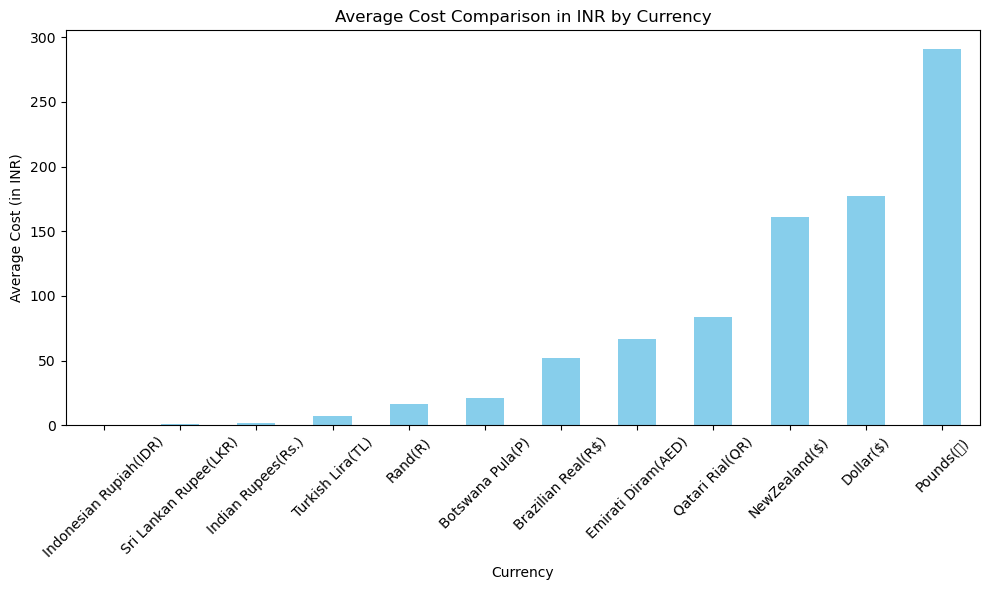

In [10]:
import matplotlib.pyplot as plt

avg_cost_inr = df.groupby('Currency')['Cost (in INR)'].mean().sort_values()

# Plotting
plt.figure(figsize=(10, 6))
avg_cost_inr.plot(kind='bar', color='skyblue')
plt.xlabel('Currency')
plt.ylabel('Average Cost (in INR)')
plt.title('Average Cost Comparison in INR by Currency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
df_country = pd.read_excel(r"C:\My Folder\Tuts\Python\Project\Project 5 - Final Project\Zomato ViZ assignment\Country-Code.xlsx")

In [12]:
df_country

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [13]:
df_merge = pd.merge(df,df_country, how = 'left', on = ['Country Code', 'Country Code'])

In [14]:
df_merge

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Cost (in INR),Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,18.63,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,No,No,3,4.5,Dark Green,Excellent,591,18.63,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,No,No,4,4.4,Green,Very Good,270,24.84,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,4,4.9,Dark Green,Excellent,365,24.84,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,No,No,4,4.8,Dark Green,Excellent,229,24.84,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml郾 Gurme,208,哿stanbul,"Kemanke侓 Karamustafa Pa侓a Mahallesi, R郾ht郾m Ca...",Karak韄y,"Karak韄y, 哿stanbul",28.977392,41.022793,Turkish,...,No,No,No,3,4.1,Green,Very Good,788,7.65,Turkey
9547,5908749,Ceviz A埕ac郾,208,哿stanbul,"Ko侓uyolu Mahallesi, Muhittin 盱st韄nda埕 Caddesi,...",Ko侓uyolu,"Ko侓uyolu, 哿stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,3,4.2,Green,Very Good,1034,7.65,Turkey
9548,5915807,Huqqa,208,哿stanbul,"Kuru韄e侓me Mahallesi, Muallim Naci Caddesi, No ...",Kuru韄e侓me,"Kuru韄e侓me, 哿stanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,4,3.7,Yellow,Good,661,10.20,Turkey
9549,5916112,A侓侓k Kahve,208,哿stanbul,"Kuru韄e侓me Mahallesi, Muallim Naci Caddesi, No ...",Kuru韄e侓me,"Kuru韄e侓me, 哿stanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,4,4.0,Green,Very Good,901,10.20,Turkey


In [15]:
df_merge.drop(columns=['Country Code'], inplace = True)

In [16]:
df_merge

,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Cost (in INR),Country
0,6317637,Le Petit Souffle,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,...,No,No,No,3,4.8,Dark Green,Excellent,314,18.63,Phillipines
1,6304287,Izakaya Kikufuji,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,...,No,No,No,3,4.5,Dark Green,Excellent,591,18.63,Phillipines
2,6300002,Heat - Edsa Shangri-La,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,...,No,No,No,4,4.4,Green,Very Good,270,24.84,Phillipines
3,6318506,Ooma,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,...,No,No,No,4,4.9,Dark Green,Excellent,365,24.84,Phillipines
4,6314302,Sambo Kojin,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,...,No,No,No,4,4.8,Dark Green,Excellent,229,24.84,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml郾 Gurme,哿stanbul,"Kemanke侓 Karamustafa Pa侓a Mahallesi, R郾ht郾m Ca...",Karak韄y,"Karak韄y, 哿stanbul",28.977392,41.022793,Turkish,80,...,No,No,No,3,4.1,Green,Very Good,788,7.65,Turkey
9547,5908749,Ceviz A埕ac郾,哿stanbul,"Ko侓uyolu Mahallesi, Muhittin 盱st韄nda埕 Caddesi,...",Ko侓uyolu,"Ko侓uyolu, 哿stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,...,No,No,No,3,4.2,Green,Very Good,1034,7.65,Turkey
9548,5915807,Huqqa,哿stanbul,"Kuru韄e侓me Mahallesi, Muallim Naci Caddesi, No ...",Kuru韄e侓me,"Kuru韄e侓me, 哿stanbul",29.034640,41.055817,"Italian, World Cuisine",170,...,No,No,No,4,3.7,Yellow,Good,661,10.20,Turkey
9549,5916112,A侓侓k Kahve,哿stanbul,"Kuru韄e侓me Mahallesi, Muallim Naci Caddesi, No ...",Kuru韄e侓me,"Kuru韄e侓me, 哿stanbul",29.036019,41.057979,Restaurant Cafe,120,...,No,No,No,4,4.0,Green,Very Good,901,10.20,Turkey


In [17]:
df_merge.to_csv('Zomato_Data_Analysis.csv', index = False)